# Understanding thickness assessments

In [41]:
import numpy as np
import matplotlib.pyplot as plt 

## Setup

![](https://raw.githubusercontent.com/kelu124/echomods/master/matty/20190329a/photos/P_20190329_214159.jpg)

## Example of a result


![](data/NDT_stairs/20190404a-3.jpg)

For more ideas about the processing, [check the experiment on its page](https://github.com/kelu124/echomods/tree/master/matty/20190404a).

We should have 10 lines, 57us long each, at 64 Msps, that's around 3648pts per line.

In [18]:
signal_20mm = np.load("data/NDT_stairs/20190404a-3.npz")["data"]
print(np.shape(signal))

(10, 3648)


In [19]:
signal_10mm = np.load("data/NDT_stairs/20190404a-5.npz")["data"]
print(np.shape(signal))

(10, 3648)


In [25]:
signal_15mm = np.load("data/NDT_stairs/20190404a-4.npz")["data"]
print(np.shape(signal))

(10, 3648)


In [42]:
# Creating time
t = [x*57/3648 for x in range(3648)]
# and frequencies
f = [x*64/len(FFT) for x in range(3648)] # frequencies in MHz

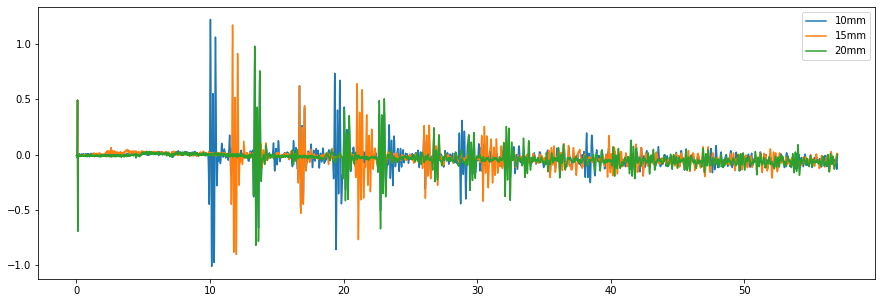

In [43]:
# Let's plot the first line 
plt.figure(figsize=(15,5))
plt.plot(t,signal_10mm[0],label="10mm")
plt.plot(t,signal_15mm[0],label="15mm")
plt.plot(t,signal_20mm[0],label="20mm")
plt.legend()

We see pulses that take longer to reach as thickness of the steel block increase. That's it !


### Let's lower the noise by doing an average of the 10 lines we have.

In [44]:
mean_signal_10mm = np.mean(signal_10mm, axis=0)
mean_signal_15mm = np.mean(signal_15mm, axis=0)
mean_signal_20mm = np.mean(signal_20mm, axis=0)

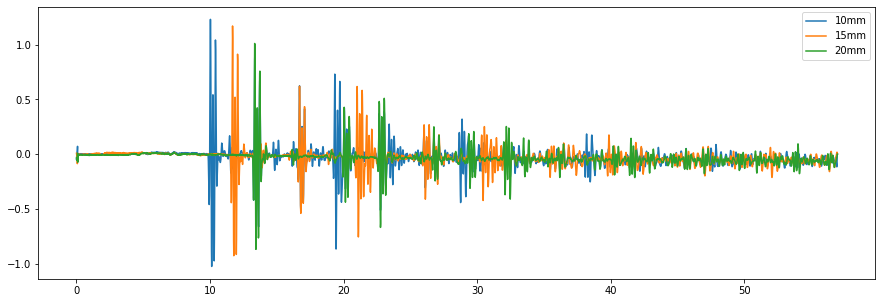

In [45]:
# Let's plot the first line 
plt.figure(figsize=(15,5))
plt.plot(t,mean_signal_10mm,label="10mm")
plt.plot(t,mean_signal_15mm,label="15mm")
plt.plot(t,mean_signal_20mm,label="20mm")
plt.legend()

### Checking the spectral content

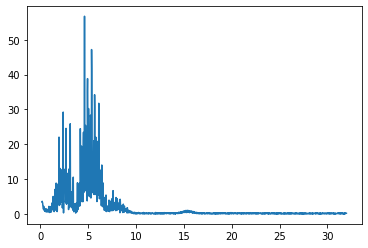

In [40]:
FFT = np.fft.fft(mean_signal_20mm)

plt.plot(f[10:len(FFT)//2],np.abs(FFT[10:len(FFT)//2]))